# **Trabalho prático Arvore de Decisão, Modelo Linear para Classificação -- Lasso e Redes Neurais Artificiais**

1- Carregar a base IRIS;
2- Separar a base em Treino (50%) e Teste (50%);
3-
Repartir Treino em 10 partes escolhidas aleatoriamente, ou seja, cada
parte Pi terá 10% da quantidade de exemplos do Treino. Lembre-se que
Pi+1 = Pi + 10% dos dados de Treino;
Para cada Pi faça:

      4- Treinar/Ajustar Árvores de Decisão, Rígido, Logístico e RNA i utilizando de Pi;
      5- Classificar/Predizer o conjunto Teste
      6- Calcular acurácia da árvore i  na predição do Teste;

7- Criar um gráfico de linha para cada modelo de aprendizagem (árvore de decisão, Linear e RNA), onde eixo x é o Pi (tamanho do conjunto de treino) e eixo y será a acurácia obtida pela árvore i.

8- Calcular a acurácia média e o desvio padrão para cada método e plotar esses 4 resultados em gráfico candle stick. Onde x são os métodos e y estão as acurácias.

Primeiramente, é necessário separar os conjuntos de treino e teste conforme o estipulado. Dessa forma, Pi = Pi-1 + 10% do conjunto.

In [ ]:
from random import choice
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np

# Variaveis globais
escolhidos = []
acuracias_arvore = []
acuracias_linear_rigido = []
acuracias_regressao_logistica = []
acuracias_mlp = []
q_treinos = []
pi_treinos = []
pi_testes = []
treino_aux = []
teste_aux = []


# Carrega base de dados
X, y = load_iris(return_X_y=True)
# Divide o treino e teste em 50% cada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

treinos = [[] for i in range(10)]
teste = [[] for i in range(10)]

# Separa os Pi, sendo Pi = Pi-1 + 10%
for i in range(9):
    for j in range(7):
        numero_escolhido = choice([k for k in range(0, 75) if k not in escolhidos])
        treinos[i].append(X_train[numero_escolhido])
        teste[i].append(y_train[numero_escolhido])
        escolhidos.append(numero_escolhido)
    treino_aux.extend(treinos[i])
    teste_aux.extend(teste[i])
    pi_treinos.append(np.asarray(treino_aux))
    pi_testes.append(np.asarray(teste_aux))

for j in range(12):
    numero_escolhido = choice([k for k in range(0, 75) if k not in escolhidos])
    treinos[9].append(X_train[numero_escolhido])
    teste[9].append(y_train[numero_escolhido])
    escolhidos.append(numero_escolhido)
treino_aux.extend(treinos[9])
teste_aux.extend(teste[9])
pi_treinos.append(np.asarray(treino_aux))
pi_testes.append(np.asarray(teste_aux))

Agora, com os conjuntos separados, já é possível fazer o treino de cada modelo e obter as metricas de acurácia, média e desvio padrão.

In [ ]:
# Faz os fits de cada Pi e guarda o resultado
for Pi in range(10):
    q_treinos.append(pi_treinos[Pi].shape[0])
    clf = tree.DecisionTreeClassifier(criterion='gini')  # instancia o objeto da classe de árvore de decisão
    clf = clf.fit(pi_treinos[Pi], pi_testes[Pi])  # cria a árvore
    resposta = clf.predict(X_test)
    acuracia = accuracy_score(resposta, y_test)
    print(f'Arvore decisao: Acuracia de P{Pi} = {acuracia}')
    acuracias_arvore.append(acuracia)
med_arvore = np.mean(acuracias_arvore)
desv_arvore = np.std(acuracias_arvore)

for Pi in range(10):
    clf = RidgeClassifier(random_state=0)  # instancia o objeto da classe de linear rigido
    clf = clf.fit(pi_treinos[Pi], pi_testes[Pi]) # fita
    acuracia = clf.score(X_test, y_test)
    print(f'Linear rigido: Acuracia de P{Pi} = {acuracia}')
    acuracias_linear_rigido.append(acuracia)
med_linear = np.mean(acuracias_linear_rigido)
desv_linear = np.std(acuracias_linear_rigido)

for Pi in range(10):
    clf = LogisticRegression(random_state=0, max_iter=120) # instancia o objeto da classe de regressao logistica
    clf = clf.fit(pi_treinos[Pi], pi_testes[Pi]) # fita
    acuracia = clf.score(X_test, y_test)
    print(f'Regressao Logistica: Acuracia de P{Pi} = {acuracia}')
    acuracias_regressao_logistica.append(acuracia)
med_regressao = np.mean(acuracias_regressao_logistica)
desv_regressao = np.std(acuracias_regressao_logistica)

for Pi in range(10):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=0, max_iter=200)
    clf = clf.fit(pi_treinos[Pi], pi_testes[Pi])
    acuracia = clf.score(X_test, y_test)
    print(f'MLP: Acuracia de P{Pi} = {acuracia}')
    acuracias_mlp.append(acuracia)
med_mlp = np.mean(acuracias_mlp)
desv_mlp = np.std(acuracias_mlp)

Arvore decisao: Acuracia de P0 = 0.6666666666666666
Arvore decisao: Acuracia de P1 = 0.96
Arvore decisao: Acuracia de P2 = 0.9466666666666667
Arvore decisao: Acuracia de P3 = 0.9466666666666667
Arvore decisao: Acuracia de P4 = 0.9466666666666667
Arvore decisao: Acuracia de P5 = 1.0
Arvore decisao: Acuracia de P6 = 1.0
Arvore decisao: Acuracia de P7 = 1.0
Arvore decisao: Acuracia de P8 = 1.0
Arvore decisao: Acuracia de P9 = 0.9466666666666667
Linear rigido: Acuracia de P0 = 0.76
Linear rigido: Acuracia de P1 = 0.84
Linear rigido: Acuracia de P2 = 0.88
Linear rigido: Acuracia de P3 = 0.8666666666666667
Linear rigido: Acuracia de P4 = 0.8266666666666667
Linear rigido: Acuracia de P5 = 0.76
Linear rigido: Acuracia de P6 = 0.7866666666666666
Linear rigido: Acuracia de P7 = 0.84
Linear rigido: Acuracia de P8 = 0.8666666666666667
Linear rigido: Acuracia de P9 = 0.8533333333333334
Regressao Logistica: Acuracia de P0 = 0.8933333333333333
Regressao Logistica: Acuracia de P1 = 0.9866666666666667


Em seguida, podemos apresentar os resultados nos gráficos.

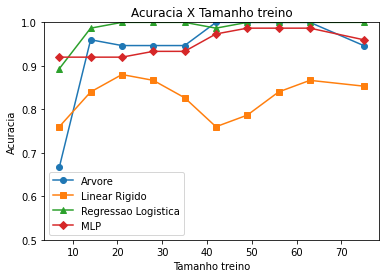

In [ ]:
# Plota o grafico
plt.plot(q_treinos, acuracias_arvore, marker='o')
plt.plot(q_treinos, acuracias_linear_rigido, marker='s')
plt.plot(q_treinos, acuracias_regressao_logistica, marker='^')
plt.plot(q_treinos, acuracias_mlp, marker='D')
plt.ylim([0.5, 1])
plt.legend(['Arvore', 'Linear Rigido', 'Regressao Logistica', 'MLP'])
plt.title('Acuracia X Tamanho treino')
plt.xlabel('Tamanho treino')
plt.ylabel('Acuracia')
plt.show()

Com os resultados, tanto analisando a acurácia quanto o gráfico, e possível notar que uma quantidade pequena do conjunto de treino não e muito eficiente quando se olha para sua acurácia. O contrário, um conjunto de treino grande, também não significa um resultado melhor, vista que a curva de aprendizado atinge um pico e cai.

Comparando os modelos aplicados, também é possível notar que a regressão logistíca, em geral, se saiu melhor que os outros métodos, tendo apresentado um resultado mais consistente durante as rodadas. Do outro lado, o modelo linear rígido foi o que apresentou o pior desempenho. Os demais, na média, apresentaram um resultado parecido com a regressão logística, com uma acuracia um pouco menor na média.